In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [13]:
metadata_filename = 'SPGC-metadata-2018-07-18.csv'

metadata_df = pd.read_csv(metadata_filename)

metadata_df

,id,title,author,authoryearofbirth,authoryearofdeath,language,downloads,subjects,type
0,PG0,NaN,NaN,NaN,NaN,NaN,NaN,set(),Text
1,PG1,The Declaration of Independence of the United ...,"Jefferson, Thomas",1743.0,1826.0,['en'],604.0,"{'United States -- History -- Revolution, 1775...",Text
2,PG2,The United States Bill of Rights: The Ten Orig...,United States,NaN,NaN,['en'],158.0,"{'Civil rights -- United States -- Sources', '...",Text
3,PG3,John F. Kennedy's Inaugural Address,"Kennedy, John F. (John Fitzgerald)",1917.0,1963.0,['en'],28.0,{'Presidents -- United States -- Inaugural add...,Text
4,PG4,Lincoln's Gettysburg Address: Given November 1...,"Lincoln, Abraham",1809.0,1865.0,['en'],55.0,{'Consecration of cemeteries -- Pennsylvania -...,Text
...,...,...,...,...,...,...,...,...,...
57708,PG57710,A Son of the State,"Ridge, W. Pett (William Pett)",NaN,1930.0,['en'],0.0,set(),Text
57709,PG57711,Hudson Tercentenary: An historical retrospect ...,"Chamberlain, Frank",NaN,NaN,['en'],0.0,set(),Text
57710,PG57712,Proses moroses,"Gourmont, Remy de",1858.0,1915.0,['fr'],0.0,set(),Text
57711,PG57713,The Animal Parasites of Man,"Theobald, F. V.",NaN,NaN,['en'],0.0,set(),Text


In [5]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57713 entries, 0 to 57712
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 57713 non-null  object 
 1   title              57642 non-null  object 
 2   author             55451 non-null  object 
 3   authoryearofbirth  42946 non-null  float64
 4   authoryearofdeath  41850 non-null  float64
 5   language           57711 non-null  object 
 6   downloads          57711 non-null  float64
 7   subjects           57713 non-null  object 
 8   type               57713 non-null  object 
dtypes: float64(3), object(6)
memory usage: 4.0+ MB


In [6]:
metadata_df.type.unique()

array(['Text', 'Dataset', 'StillImage', 'MovingImage', 'Sound', 'Image',
       'Collection'], dtype=object)

In [7]:
metadata_df.language.unique()

array([nan, "['en']", "['la']", "['es']", "['en', 'de']", "['de', 'la']",
       "['fr']", "['it']", "['ja']", "['de']", "['zh', 'en']", "['sv']",
       "['da']", "['cy']", "['bg']", "['fr', 'en']", "['pt']", "['nl']",
       "['de', 'en']", "['en', 'zh']", "['el']", "['zh']", "['he']",
       "['en', 'es']", "['ru']", "['hu', 'en']", "['ko', 'en']", "['pl']",
       "['fi']", "['la', 'en']", "['en', 'eo']", "['enm', 'en']",
       "['eo', 'en']", "['eo']", "['en', 'la']", "['sv', 'en']",
       "['en', 'fr']", "['sa']", "['ang', 'en']", "['en', 'ang']",
       "['cy', 'en']", "['en', 'ale']", "['es', 'en']", "['yi']",
       "['lt']", "['es', 'nai']", "['sr']", "['no']", "['ca', 'de']",
       "['ro']", "['nah', 'en']", "['en', 'kha']", "['cs']", "['tl']",
       "['en', 'it']", "['en', 'enm']", "['ca']", "['en', 'cy']",
       "['is']", "['de', 'fr']", "['myn']", "['fr', 'nai']",
       "['tl', 'es']", "['ilo']", "['ia']", "['tl', 'en', 'es']",
       "['ga']", "['ilo', 'es']", "['f

In [9]:
metadata_df[metadata_df.author == 'Nietzsche, Friedrich Wilhelm']

,id,title,author,authoryearofbirth,authoryearofdeath,language,downloads,subjects,type
1997,PG1998,Thus Spake Zarathustra: A Book for All and None,"Nietzsche, Friedrich Wilhelm",1844.0,1900.0,['en'],3742.0,"{'Philosophy, German', 'Superman (Philosophica...",Text
4362,PG4363,Beyond Good and Evil,"Nietzsche, Friedrich Wilhelm",1844.0,1900.0,['en'],4629.0,"{'Philosophy, German', 'Ethics'}",Text
5257,PG5258,Ainsi Parlait Zarathoustra,"Nietzsche, Friedrich Wilhelm",1844.0,1900.0,['fr'],75.0,"{'Philosophy, German', 'Superman (Philosophica...",Text
5651,PG5652,"Thoughts out of Season, Part I","Nietzsche, Friedrich Wilhelm",1844.0,1900.0,['en'],73.0,"{'Wagner, Richard, 1813-1883', 'Philosophy, Ge...",Text
7201,PG7202,"Ecce homo, Wie man wird, was man ist","Nietzsche, Friedrich Wilhelm",1844.0,1900.0,['de'],200.0,"{'Philosophy, German', 'Philosophers -- German...",Text
7202,PG7203,Götzen-Dämmerung,"Nietzsche, Friedrich Wilhelm",1844.0,1900.0,['de'],155.0,"{'Philosophy, German'}",Text
7203,PG7204,Jenseits von Gut und Böse,"Nietzsche, Friedrich Wilhelm",1844.0,1900.0,['de'],284.0,"{'Philosophy, German', 'Ethics'}",Text
7204,PG7205,Also sprach Zarathustra: Ein Buch für Alle und...,"Nietzsche, Friedrich Wilhelm",1844.0,1900.0,['de'],718.0,"{'Philosophy, German', 'Superman (Philosophica...",Text
7205,PG7206,Die Geburt der Tragödie: Versuch einer Selbstk...,"Nietzsche, Friedrich Wilhelm",1844.0,1900.0,['de'],80.0,"{'Philosophy, German', 'Music -- Philosophy an...",Text
7206,PG7207,"Menschliches, Allzumenschliches: Ein Buch Fuer...","Nietzsche, Friedrich Wilhelm",1844.0,1900.0,['de'],121.0,"{'Philosophy, German', 'Human beings'}",Text


Does not differentiate between translated works and works in their originals, therefore there can be multiple translations of the same work, or even different versions of the same work

In [10]:
filtered_df = metadata_df[(metadata_df.language == "['en']") & (metadata_df.type == 'Text')]

SELECTED_COLUMNS = ['id', 'title', 'author', 'authoryearofbirth', 'authoryearofdeath']
filtered_df = filtered_df.dropna(subset=SELECTED_COLUMNS)
filtered_df = filtered_df[SELECTED_COLUMNS]
filtered_df = filtered_df.reset_index(drop=True)

filtered_df

,id,title,author,authoryearofbirth,authoryearofdeath
0,PG1,The Declaration of Independence of the United ...,"Jefferson, Thomas",1743.0,1826.0
1,PG3,John F. Kennedy's Inaugural Address,"Kennedy, John F. (John Fitzgerald)",1917.0,1963.0
2,PG4,Lincoln's Gettysburg Address: Given November 1...,"Lincoln, Abraham",1809.0,1865.0
3,PG6,Give Me Liberty or Give Me Death,"Henry, Patrick",1736.0,1799.0
4,PG8,Abraham Lincoln's Second Inaugural Address,"Lincoln, Abraham",1809.0,1865.0
...,...,...,...,...,...
31619,PG57703,Index of the Project Gutenberg Works of Vaugha...,"Kester, Vaughan",1869.0,1911.0
31620,PG57705,"An Universal Dictionary of the Marine: Or, a C...","Falconer, William",1732.0,1769.0
31621,PG57706,Index of the Project Gutenberg Works of Henry ...,"Lawson, Henry",1867.0,1922.0
31622,PG57707,The Great War of 189-,"Forbes, Archibald",1838.0,1900.0


In [11]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31624 entries, 0 to 31623
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 31624 non-null  object 
 1   title              31624 non-null  object 
 2   author             31624 non-null  object 
 3   authoryearofbirth  31624 non-null  float64
 4   authoryearofdeath  31624 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.2+ MB


In [14]:
filtered_df['author'].value_counts()

Lytton, Edward Bulwer Lytton, Baron    216
Shakespeare, William                   179
Ebers, Georg                           164
Twain, Mark                            150
Parker, Gilbert                        133
                                      ... 
Murray, D. L. (David Leslie)             1
Ward, John                               1
Wilderspin, Samuel                       1
Boelcke, Oswald                          1
Falconer, William                        1
Name: author, Length: 9288, dtype: int64

In [105]:
filtered_df['authoryearofbirth'].value_counts()

1862.0    750
1863.0    726
1866.0    619
1856.0    603
1850.0    558
         ... 
39.0        1
1474.0      1
1287.0      1
1602.0      1
1490.0      1
Name: authoryearofbirth, Length: 460, dtype: int64

In [115]:
filtered_df['authoryearofbirth'].min()

-750.0

In [116]:
filtered_df['authoryearofbirth'].max()

1970.0

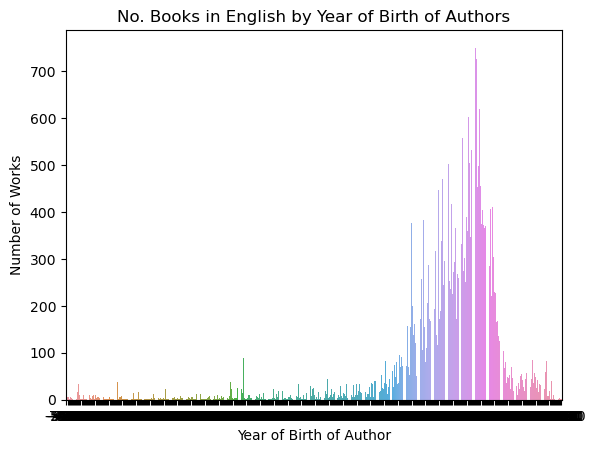

In [124]:
sns.barplot(x = filtered_df['authoryearofbirth'].value_counts().index, y=filtered_df['authoryearofbirth'].value_counts())
plt.title('No. Books in English by Year of Birth of Authors')
plt.xlabel('Year of Birth of Author')
plt.ylabel('Number of Works')

# xticks = np.arange(-750.0, 1970.0, 50.0)

# plt.xticks(xticks)

plt.show()

In [128]:
# plt.title('No. Authors in English by Year of Birth of Authors')
# plt.xlabel('Year of Birth of Author')
# plt.ylabel('Number of Authors')
# plt.show()